# (PISA 2012 Exploration)
## by (Azka Abiya Amir)

## Preliminary Wrangling

PISA serves as a means of understanding how well prepared students are for life beyond school as they approach the end of their mandatory education. This survey is designed for students between the ages of 15 and 16. The assessments are based on 'Mathematics, 'Science' and 'Reading'.

In the year 2012, a total number of 510,000 students from 65 different economies took part in the 5th PISA survey.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re

%matplotlib inline

sb.set()

import warnings
warnings.filterwarnings('ignore')

color = sb.color_palette()[0]

# Setting the number of columns to be displayed according to the number of variables listed in the pisa 2012 data dictionary.
pd.set_option('display.max_rows', 636) 
pd.set_option('display.max_columns', 636)

In [2]:
# loading the dataset into a pandas dataframe.
pisa_2012 = pd.read_csv('pisa2012.csv',encoding='latin-1', low_memory = False)

pisa_dict_2012 = pd.read_csv('pisadict2012.csv',encoding='latin-1', low_memory = False)


In [3]:
# data shape
pisa_2012.shape

(485490, 636)

In [4]:
# dtype, null values
pisa_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [5]:
pisa_2012.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,ST21Q01,ST26Q15,ST26Q16,ST26Q17,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC05Q01,IC06Q01,IC07Q01,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,CLCUSE301,CLCUSE302,DEFFORT,AGE,GRADE,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,HEDRES,HERITCUL,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,LANGCOMM,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MMINS,MTSUP,OPENPS,OUTHOURS,PARED,PERSEV,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUDREL,ANCSUBNORM,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1MACC,PV2MACC,PV3MACC,PV4MACC,PV5MACC,PV1MACQ,PV2MACQ,PV3MACQ,PV4MACQ,PV5MACQ,PV1MACS,PV2MACS,PV3MACS,PV4MACS,PV5MACS,PV1MACU,PV2MACU,PV3MACU,PV4MACU,PV5MACU,PV1MAPE,PV2MAPE,PV3MAPE,PV4MAPE,PV5MAPE,PV1MAPF,PV2MAPF,PV3MAPF,PV4MAPF,PV5MAPF,PV1MAPI,PV2MAPI,PV3MAPI,PV4MAPI,PV5MAPI,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT,W_FSTR1,W_FSTR2,W_FSTR3,W_FSTR4,W_FSTR5,W_FSTR6,W_FSTR7,W_FSTR8,W_FSTR9,W_FSTR10,W_FSTR11,W_FSTR12,W_FSTR13,W_FSTR14,W_FSTR15,W_FSTR16,W_FSTR17,W_FSTR18,W_FSTR19,W_FSTR20,W_FSTR21,W_FSTR22,W_FSTR23,W_FSTR24,W_FSTR25,W_FSTR26,W_FSTR27,W_FSTR28,W_FSTR29,W_FSTR30,W_FSTR31,W_FSTR32,W_FSTR33,W_FSTR34,W_FSTR35,W_FSTR36,W_FSTR37,W_FSTR38,W_FSTR39,W_FSTR40,W_FSTR41,W_FSTR42,W_FSTR43,W_FSTR44,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,32728.000000,4.854900e+05,4.854900e+05,4.854900e+05,301367.000000,269808.000000,283813.000000,279657.000000,289502.000000,289428.000000,299618.000000,298601.000000,291943.000000,296878.000000,298339.000000,289068.000000,255665.000000,294163.000000,311290.000000,310906.000000,310321.00000,310655.000000,310449.000000,309969.000000,310366.000000,310156.000000,485490.000000,485490.000000,485490.000000,169730.000000,169765.000000,169779.000000,169783.000000,169784.000000,169798.000000,169796.000000,169786.000000,169799.000000,169655.000000,169641.00000,169656.000000,169716.000000,169716.000000,169725.000000,169643.000000,169640.000000,169636.000000,485490.000000,485490.000000,485490.000000,485374.000000,484617.000000,314764.000000,312584.000000,311675.000000,313399.000000,416150.000000,364814.000000,312708.000000,314557.000000,13380.000000,471357.000000,314777.000000,295195.000000,473648.000000,313279.000000,312602.000000,314448.000000,310304.000000,308442.000000,429058.000000,477772.000000,13496.000000,450621.000000,479807.000000,293194.000000,13598.000000,289744.000000,290490.000000,298740.000000,477754.000000,297995.000000,165792.000000,83305.000000,83305.000000,316322.000000,316708.000000,44094.000000,43137.000000,282866.000000,313847.000000,315948.000000,301360.000000,314501.000000,283303.000000,313599.000000,312766.000000,308799.000000,473091.000000,313172.000000,314607.000000,270914.000000,313860.000000,316323.000000,314678.000000,315114.000000,315519.000000,316371.000000,297074.000000,290260.000000,292585.000000,479597.00000,306835.000000,306487.000000,307640.000

In [6]:
# Displaying te top 5 rows of the dataframe
pisa_2012.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

# Issues Identified

## Quality

1. Nan values in 5 of the variables of interest.
2. Inconsistent formats for multiple variables.
3. Too much data.

## Tidiness

1. Ambiguous column names for the variables of interest.
2. Data for the taret variables aka subjects' score provided in multiple columns instead of one.
3. The values for the ordinal type of variables not ordered.

## Cleaning

<a id='issue01'><a/>
## Issue # 01:

The data is too large, there is a lot of irrelavent information. The variables of interest were selected and a subset of the data was seperated.

#### Code

In [7]:
# copy of the dataframe to work with
pisa_2012_clean = pisa_2012.copy()

In [8]:
# extracting the variable of interest

variables_interest = ['CNT', 'ST03Q02', 'ST04Q01', 'ST13Q01', 'ST17Q01', 'ST28Q01', 'ST35Q01', 'AGE', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']

pisa_2012_clean = pisa_2012_clean[variables_interest]

In [9]:
# # dropping the redundant columns
# pisa_2012_clean = pisa_2012_clean.drop(columns=['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','PV1READ','PV2READ','PV3READ','PV4READ','PV5READ','PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE'])

#### Test

In [10]:
pisa_2012_clean.head(2)

,CNT,ST03Q02,ST04Q01,ST13Q01,ST17Q01,ST28Q01,ST35Q01,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,1996,Female,<ISCED level 3A>,<ISCED level 3A>,0-10 books,Disagree,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,1996,Female,<ISCED level 3A>,<ISCED level 3A>,201-500 books,Strongly agree,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116


<a id='issue02'><a/>
## Issue # 02:

Ambiguous column names assigned to the variables of interest. All the columns were renamed with meaningful and descriptive names.

#### Code

In [11]:
# renaming the variables with appropriate column names

pisa_2012_clean.rename({'CNT' : 'Country_Code', 'ST03Q02' : 'Birth_Year', 'ST04Q01' : 'Gender', 'ST13Q01' : 'Mother_Education', 'ST17Q01' : 'Father_Education', 'ST28Q01' : 'Num_Books_Home', 'ST35Q01' : 'Friends_Ability_Maths', 'AGE' : 'Age'}, axis = 'columns', inplace = True)

#### Test

In [12]:
pisa_2012_clean.head(2)

,Country_Code,Birth_Year,Gender,Mother_Education,Father_Education,Num_Books_Home,Friends_Ability_Maths,Age,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,1996,Female,<ISCED level 3A>,<ISCED level 3A>,0-10 books,Disagree,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,1996,Female,<ISCED level 3A>,<ISCED level 3A>,201-500 books,Strongly agree,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116


<a id='issue03'><a/>
## Issue # 03:

Data for the taret variables aka subjects' score provided in multiple columns instead of one. The values for all the columns for each subject variable were averaged into one single column.

#### Code

In [13]:
# appending the 5 columns for maths, reading, science into single cpolumns per subject
pisa_2012_clean['Mathematics'] = (pisa_2012_clean['PV1MATH'] + pisa_2012_clean['PV2MATH'] + pisa_2012_clean['PV3MATH'] + pisa_2012_clean['PV4MATH'] + pisa_2012_clean['PV5MATH']) / 5
pisa_2012_clean['Reading'] = (pisa_2012_clean['PV1READ'] + pisa_2012_clean['PV2READ'] + pisa_2012_clean['PV3READ'] + pisa_2012_clean['PV4READ'] + pisa_2012_clean['PV5READ']) / 5
pisa_2012_clean['Science'] = (pisa_2012_clean['PV1SCIE'] + pisa_2012_clean['PV2SCIE'] + pisa_2012_clean['PV3SCIE'] + pisa_2012_clean['PV4SCIE'] + pisa_2012_clean['PV5SCIE']) / 5

#### Test

In [14]:
pisa_2012_clean.head()

,Country_Code,Birth_Year,Gender,Mother_Education,Father_Education,Num_Books_Home,Friends_Ability_Maths,Age,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Mathematics,Reading,Science
0,Albania,1996,Female,<ISCED level 3A>,<ISCED level 3A>,0-10 books,Disagree,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348
1,Albania,1996,Female,<ISCED level 3A>,<ISCED level 3A>,201-500 books,Strongly agree,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382
2,Albania,1996,Female,"<ISCED level 3B, 3C>",<ISCED level 3A>,More than 500 books,Strongly agree,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946
3,Albania,1996,Female,"<ISCED level 3B, 3C>",<ISCED level 3A>,11-25 books,NaN,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,449.45476,477.46376,453.97240
4,Albania,1996,Female,She did not complete <ISCED level 1>,"<ISCED level 3B, 3C>",101-200 books,Strongly agree,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,256.01010,367.15778


<a id='issue04'><a/>
## Issue # 04:

Inconsistent format for the values of multiple columns.
    

Regular expression was used to extract the desired information from each of the values of the concerned columns. The null values were replaced with '1-1' so that 're' could be used. The values for the 'Num_Books_Home' column representing books with 'more than 500 books' were replaced with '600' in order to make them distinguishable from the '201-500 books' values.

#### Code

Dealing with the variables for the education levels of parents.

In [15]:
# Replacing null values with communicative strings
pisa_2012_clean.loc[pisa_2012_clean['Mother_Education'].isna() == True, 'Mother_Education'] = 'Data Missing'
pisa_2012_clean.loc[pisa_2012_clean['Father_Education'].isna() == True, 'Father_Education'] = 'Data Missing'

In [16]:
pisa_2012_clean.loc[pisa_2012_clean['Mother_Education'].str.contains('She did not complete <ISCED level 1>') , 'Mother_Education'] = 'ISCED level 0'
pisa_2012_clean.loc[pisa_2012_clean['Father_Education'].str.contains('He did not complete <ISCED level 1>') , 'Father_Education'] = 'ISCED level 0'

In [17]:
# standardizing the education level of parents
columns = ['Mother_Education','Father_Education']
for col in columns:
    pisa_2012_clean[col]= pisa_2012_clean[col].apply(lambda x: 'ISCED level {}'.format(re.sub('.*(\d).*', r'\1', x)))


In [18]:
pisa_2012_clean['Father_Education']= pisa_2012_clean['Father_Education'].str.replace('ISCED level Data Missing', 'Data Missing')
pisa_2012_clean['Mother_Education']= pisa_2012_clean['Mother_Education'].str.replace('ISCED level Data Missing', 'Data Missing')

Dealing with the variable representing the total number of books at home.

In [19]:
# replacing null values with strings
pisa_2012_clean.loc[pisa_2012_clean['Num_Books_Home'].isna() == True, 'Num_Books_Home'] = '1-1'

In [20]:
pisa_2012_clean.loc[pisa_2012_clean['Num_Books_Home'].str.contains('More than 500 books') , 'Num_Books_Home'] = '600'

In [21]:
# standardizing the education level of parents
pisa_2012_clean['Num_Books_Home']= pisa_2012_clean['Num_Books_Home'].apply(lambda x: re.findall(r'\d+-?\d+',x)[0])

In [22]:
# replacing the sting representing null values with appropriately named string
pisa_2012_clean['Num_Books_Home']= pisa_2012_clean['Num_Books_Home'].str.replace('600', '> 500')

#### Test

In [23]:
pisa_2012_clean['Father_Education'].value_counts()

ISCED level 3    306459
ISCED level 2     84329
Data Missing      42229
ISCED level 1     35938
ISCED level 0     16535
Name: Father_Education, dtype: int64

In [24]:
pisa_2012_clean['Mother_Education'].value_counts()

ISCED level 3    320041
ISCED level 2     82614
ISCED level 1     36556
Data Missing      27511
ISCED level 0     18768
Name: Mother_Education, dtype: int64

In [25]:
pisa_2012_clean['Num_Books_Home'].value_counts()

26-100     135184
11-25       97335
0-10        95042
101-200     68350
201-500     49267
> 500       28587
1-1         11725
Name: Num_Books_Home, dtype: int64

<a id='issue05'><a/>
## Issue # 05:

Converting the 'Num_Books_Home' and 'Friends_Ability_Maths' columns into ordered categorical types.   

#### Code

In [26]:
# convert'Num_Books_Home' and 'Friends_Ability_Maths' into ordered categorical types
ordinal_var_dict = {'Num_Books_Home': ['Data Missing','0-10','11-25','26-100','101-200','201-500','> 500'],
                    'Friends_Ability_Maths': [  'Data Missing','Strongly disagree',  'Disagree','Agree','Strongly agree'],
                    'Mother_Education': ['ISCED level 0','ISCED level 1','ISCED level 2','ISCED level 3'],
                   'Father_Education': ['ISCED level 0','ISCED level 1','ISCED level 2','ISCED level 3']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        pisa_2012_clean[var] = pisa_2012_clean[var].astype(ordered_var)
    else: # pre-v0.21
        pisa_2012_clean[var] = pisa_2012_clean[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

#### Test

In [27]:
pisa_2012_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Country_Code           485490 non-null  object  
 1   Birth_Year             485490 non-null  int64   
 2   Gender                 485490 non-null  object  
 3   Mother_Education       457979 non-null  category
 4   Father_Education       443261 non-null  category
 5   Num_Books_Home         473765 non-null  category
 6   Friends_Ability_Maths  315860 non-null  category
 7   Age                    485374 non-null  float64 
 8   PV1MATH                485490 non-null  float64 
 9   PV2MATH                485490 non-null  float64 
 10  PV3MATH                485490 non-null  float64 
 11  PV4MATH                485490 non-null  float64 
 12  PV5MATH                485490 non-null  float64 
 13  PV1READ                485490 non-null  float64 
 14  PV2READ             

<a id='issue06'><a/>
## Issue # 06:

Missing data in thr form of null values in 5 columns representing different variables of interest.
    
   
As the variance in the values of the 'Age' column was inconsequencial, the nan values were replaced with the mean of the available values for the 'Age' column. The null values in the 'Mother_Education','Father_Education','Num_Books_Home' were previously replaced with '1-1', they will now be replaced with 'Data Missing'. The null values for the 'Friends_Ability_Maths' column will be replaced with 'Data Missing'.
    
Subsets are created by dropping rows with 'Data Missing'.

#### Code

In [28]:
# substituting the missing values in 'Age' with the mean of all available values in 'Age' because of their low variance.
pisa_2012_clean.loc[pisa_2012_clean['Age'].isna(), 'Age'] = pisa_2012_clean['Age'].mean()

In [29]:
pisa_2012_clean.loc[pisa_2012_clean['Friends_Ability_Maths'].isna() == True, 'Friends_Ability_Maths'] = 'Data Missing'

In [30]:
# replacing the sting representing null values with appropriately named string
pisa_2012_clean['Num_Books_Home']= pisa_2012_clean['Num_Books_Home'].str.replace('1-1', 'Data Missing')

In [31]:
# creating another dataframe for without any missing data for parents education.
pisa_2012_clean_friends = pisa_2012_clean.loc[(pisa_2012_clean['Friends_Ability_Maths']!='Data Missing'), :]
pisa_2012_clean_friends

,Country_Code,Birth_Year,Gender,Mother_Education,Father_Education,Num_Books_Home,Friends_Ability_Maths,Age,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Mathematics,Reading,Science
0,Albania,1996,Female,ISCED level 3,ISCED level 3,0-10,Disagree,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348
1,Albania,1996,Female,ISCED level 3,ISCED level 3,201-500,Strongly agree,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382
2,Albania,1996,Female,ISCED level 3,ISCED level 3,> 500,Strongly agree,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946
4,Albania,1996,Female,ISCED level 0,ISCED level 3,101-200,Strongly agree,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,256.01010,367.15778
7,Albania,1996,Male,ISCED level 3,ISCED level 3,26-100,Agree,15.83,576.5773,516.5992,532.9568,549.3145,535.2937,567.7589,465.1099,431.4282,535.6811,582.9958,611.2831,596.3633,554.4013,513.3719,519.8993,542.14830,516.59478,559.06378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485484,Vietnam,1996,Male,ISCED level 0,ISCED level 1,26-100,Agree,15.67,500.4752,498.1383,511.3803,533.9695,495.0226,433.8340,460.2982,430.6262,488.3663,523.6519,480.6416,497.4263,529.1309,503.0213,485.3040,507.79718,467.35532,499.10482
485485,Vietnam,1996,Female,ISCED level 2,ISCED level 0,26-100,Disagree,15.83,477.1849,493.5426,479.5217,486.5322,494.3215,460.2272,476.1134,472.9362,472.1419,481.6736,559.8098,528.1052,519.7128,535.5651,538.3626,486.22058,472.61846,536.31110
485486,Vietnam,1996,Male,ISCED level 0,ISCED level 2,26-100,Disagree,16.17,518.9360,515.8202,505.6940,596.8297,508.8098,490.9325,479.7053,448.4294,565.5134,451.6372,538.7355,493.9761,493.0436,561.1153,535.0056,529.21794,487.24356,524.37522
485487,Vietnam,1996,Male,ISCED level 1,ISCED level 2,0-10,Agree,15.83,475.2376,482.2480,507.9530,457.3220,508.7319,462.6239,514.7503,434.5558,457.8122,511.5425,536.8706,571.3726,488.3812,548.9929,563.9127,486.29850,476.25694,541.90600


In [32]:
# creating another dataframe for without any missing data for parents education.
pisa_2012_clean_books = pisa_2012_clean.loc[(pisa_2012_clean['Num_Books_Home']!='Data Missing'), :]
pisa_2012_clean_books

,Country_Code,Birth_Year,Gender,Mother_Education,Father_Education,Num_Books_Home,Friends_Ability_Maths,Age,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Mathematics,Reading,Science
0,Albania,1996,Female,ISCED level 3,ISCED level 3,0-10,Disagree,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348
1,Albania,1996,Female,ISCED level 3,ISCED level 3,201-500,Strongly agree,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382
2,Albania,1996,Female,ISCED level 3,ISCED level 3,> 500,Strongly agree,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946
3,Albania,1996,Female,ISCED level 3,ISCED level 3,11-25,Data Missing,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,449.45476,477.46376,453.97240
4,Albania,1996,Female,ISCED level 0,ISCED level 3,101-200,Strongly agree,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,256.01010,367.15778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485485,Vietnam,1996,Female,ISCED level 2,ISCED level 0,26-100,Disagree,15.83,477.1849,493.5426,479.5217,486.5322,494.3215,460.2272,476.1134,472.9362,472.1419,481.6736,559.8098,528.1052,519.7128,535.5651,538.3626,486.22058,472.61846,536.31110
485486,Vietnam,1996,Male,ISCED level 0,ISCED level 2,26-100,Disagree,16.17,518.9360,515.8202,505.6940,596.8297,508.8098,490.9325,479.7053,448.4294,565.5134,451.6372,538.7355,493.9761,493.0436,561.1153,535.0056,529.21794,487.24356,524.37522
485487,Vietnam,1996,Male,ISCED level 1,ISCED level 2,0-10,Agree,15.83,475.2376,482.2480,507.9530,457.3220,508.7319,462.6239,514.7503,434.5558,457.8122,511.5425,536.8706,571.3726,488.3812,548.9929,563.9127,486.29850,476.25694,541.90600
485488,Vietnam,1996,Male,ISCED level 2,ISCED level 3,26-100,Data Missing,15.83,550.9503,517.4560,529.1401,515.8981,501.0983,505.2873,522.1282,513.3068,528.5437,522.9301,511.0407,532.4879,524.0955,551.1376,514.7706,522.90856,518.43922,526.70646


In [33]:
# creating another dataframe for without any missing data for parents education.
pisa_2012_clean_parents = pisa_2012_clean.loc[(pisa_2012_clean['Mother_Education']!='Data Missing')&(pisa_2012_clean['Father_Education']!='Data Missing'), :]
pisa_2012_clean_parents.head(1)

,Country_Code,Birth_Year,Gender,Mother_Education,Father_Education,Num_Books_Home,Friends_Ability_Maths,Age,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Mathematics,Reading,Science
0,Albania,1996,Female,ISCED level 3,ISCED level 3,0-10,Disagree,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.342,406.8496,175.7053,218.5981,341.7009,408.84,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348


#### Test

In [34]:
#checking for remaining null values
sum(pisa_2012_clean['Mother_Education'].isna()), sum(pisa_2012_clean['Father_Education'].isna()), sum(pisa_2012_clean['Num_Books_Home'].isna()), sum(pisa_2012_clean['Friends_Ability_Maths'].isna())

(27511, 42229, 11725, 0)

In [35]:
pisa_2012_clean['Num_Books_Home'].value_counts(), pisa_2012_clean['Friends_Ability_Maths'].value_counts()

(26-100     135184
 11-25       97335
 0-10        95042
 101-200     68350
 201-500     49267
 > 500       28587
 Name: Num_Books_Home, dtype: int64,
 Data Missing         169630
 Agree                159579
 Disagree             107624
 Strongly agree        33907
 Strongly disagree     14750
 Name: Friends_Ability_Maths, dtype: int64)

In [36]:
pisa_2012_clean['Mother_Education'].value_counts(), pisa_2012_clean['Father_Education'].value_counts()

(ISCED level 3    320041
 ISCED level 2     82614
 ISCED level 1     36556
 ISCED level 0     18768
 Name: Mother_Education, dtype: int64,
 ISCED level 3    306459
 ISCED level 2     84329
 ISCED level 1     35938
 ISCED level 0     16535
 Name: Father_Education, dtype: int64)

In [37]:
pisa_2012_clean['Friends_Ability_Maths'].value_counts()

Data Missing         169630
Agree                159579
Disagree             107624
Strongly agree        33907
Strongly disagree     14750
Name: Friends_Ability_Maths, dtype: int64

In [38]:
# printing a sample of 10 rows to see the cleaned dataframe          
pisa_2012_clean.sample(10)

,Country_Code,Birth_Year,Gender,Mother_Education,Father_Education,Num_Books_Home,Friends_Ability_Maths,Age,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Mathematics,Reading,Science
380299,Poland,1996,Female,ISCED level 3,ISCED level 3,101-200,Disagree,15.50,521.1949,546.8998,541.4473,521.1949,566.3733,564.3613,552.4466,523.0572,549.2694,568.3328,552.7229,541.5330,568.5752,538.7355,544.3305,539.42204,551.49346,549.17942
152180,Spain,1996,Male,ISCED level 2,ISCED level 2,11-25,Agree,15.83,438.7833,401.3943,411.5205,439.5622,466.0461,475.5352,444.2593,444.2593,521.2460,496.3857,508.6162,471.3167,535.6583,514.2111,526.3335,431.46128,476.33710,511.22716
298793,Lithuania,1996,Male,ISCED level 3,ISCED level 2,201-500,Strongly agree,15.75,423.1267,409.1058,439.4843,429.3582,444.1580,406.5679,465.9118,421.8049,412.9835,431.4282,406.3223,411.9172,398.8624,466.9340,430.5670,429.04660,427.73926,422.92058
389051,Portugal,1996,Male,ISCED level 3,ISCED level 3,26-100,Agree,15.67,493.3868,512.8603,537.0073,508.9656,544.7967,503.4429,545.9460,526.6993,515.4720,539.5304,502.2753,535.8448,533.9799,540.5073,497.6128,519.40334,526.21812,522.04402
41589,Belgium,1996,Male,ISCED level 3,ISCED level 3,26-100,Data Missing,15.67,547.0556,547.8346,535.3716,554.0661,500.3194,489.1682,481.1488,515.6324,503.6033,429.8243,522.6035,490.8989,546.8482,522.6035,464.7893,536.92946,483.87540,509.54868
476922,United States of America,1996,Male,ISCED level 3,ISCED level 3,NaN,Data Missing,15.92,307.0650,285.2547,287.5915,310.1807,327.3173,351.1535,324.6893,339.1243,325.4912,328.6990,331.4435,313.7262,326.7811,313.7262,342.6333,303.48184,333.83146,325.66206
433960,Slovak Republic,1996,Male,ISCED level 3,ISCED level 3,26-100,Agree,16.08,595.3497,607.8127,546.2767,573.5395,561.0765,485.9605,506.0091,480.3468,510.0188,520.4441,528.7579,567.9224,517.5681,552.0701,532.4879,576.81102,500.55586,539.76128
369162,New Zealand,1996,Male,NaN,NaN,26-100,Data Missing,15.92,363.6158,349.5950,333.2373,348.0371,376.0788,433.0321,413.7854,345.6201,432.2301,363.2629,357.2734,422.5476,299.4592,382.4506,373.1257,354.11280,397.58612,366.97130
90687,Canada,1996,Female,ISCED level 3,ISCED level 3,26-100,Data Missing,15.92,617.8610,579.6931,562.5565,568.7880,557.8828,562.5344,563.3287,541.8823,568.8889,574.4490,570.2536,618.7430,533.8866,589.8359,586.1059,577.35628,562.21666,579.76500
151929,Spain,1996,Male,ISCED level 2,ISCED level 1,101-200,Agree,15.75,310.4923,356.4496,352.5549,329.9657,391.5018,382.4293,395.2605,317.4718,337.5204,425.7344,377.5084,394.2932,360.7236,369.1160,425.0653,348.19286,371.68328,385.34130


In [39]:
pisa_2012_clean.describe()

,Birth_Year,Age,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Mathematics,Reading,Science
count,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.00000,485490.000000,485490.000000,485490.000000,485490.000000
mean,1996.070061,15.784283,469.621653,469.648358,469.648930,469.641832,469.695396,472.004640,472.068052,472.022059,471.926562,472.013506,475.769824,475.813674,475.851549,475.78524,475.820184,469.651234,472.006964,475.808094
std,0.255250,0.290186,103.265391,103.382077,103.407631,103.392286,103.419170,102.505523,102.626198,102.640489,102.576066,102.659989,101.464426,101.514649,101.495072,101.51220,101.566347,100.786610,98.863310,97.998470
min,1996.000000,15.170000,19.792800,6.473000,42.226200,24.622200,37.085200,0.083400,0.703500,0.703500,4.134400,2.307400,2.648300,2.834800,11.879900,8.42970,17.754600,54.767080,6.445400,25.158540
25%,1996.000000,15.580000,395.318600,395.318600,395.240700,395.396500,395.240700,403.600700,403.360100,403.360100,403.354600,403.360100,404.457300,404.457300,404.550500,404.45730,404.457300,396.019620,405.044200,405.762800
50%,1996.000000,15.750000,466.201900,466.124000,466.201900,466.279800,466.435600,475.455000,475.535200,475.455000,475.535200,475.535200,475.699400,475.606100,475.699400,475.97910,475.885900,465.734520,475.477980,475.512860
75%,1996.000000,16.000000,541.057800,541.447300,541.291500,541.447300,541.447300,544.502500,544.503500,544.503500,544.502500,544.503500,547.780700,547.873900,547.967200,547.78070,547.780700,540.123060,542.831195,546.381920
max,1997.000000,16.330000,962.229300,957.010400,935.745400,943.456900,907.625800,904.802600,881.239200,884.447000,881.159000,901.608600,903.338300,900.540800,867.624000,926.55730,880.958600,903.107960,849.359740,857.832900


In [40]:
pisa_2012_clean.shape

(485490, 26)


The cleaned dataframe has 11 columns and 485490 rows.


The pisa 2012 data dictionary provided the information on what each variable represented with in the data. The questions to be answered are as followed:
 
1. What's the performance of students from each country in terms of the subjects observed in the data: Math, Science and Reading?

2. What's the performance of each gender as compared to the other?

3. How well do countries perform as compared to each other?

4. How does the literacy level of the parents effects the performance of the children?

5. How does the variation in the level of education of the parents effect the performance of the students?

6. How does the accessability of book at home effect the performance of the students?

7. How does the performance of friends effect the performance of the students?


The following variables will help in answering the questions I've posed:

01. Country code

02. Birth_Year

03. Gender

04. Mother_Education

05. Father_Education

06. Number of Books available to home.

07. proficiency of friends in the subject of Mathematics.

08. Age

09. Mathematics

10. Reading

11. Science

## Univariate Exploration

### Distribution of students' scores across the three subject variables, using histograms.

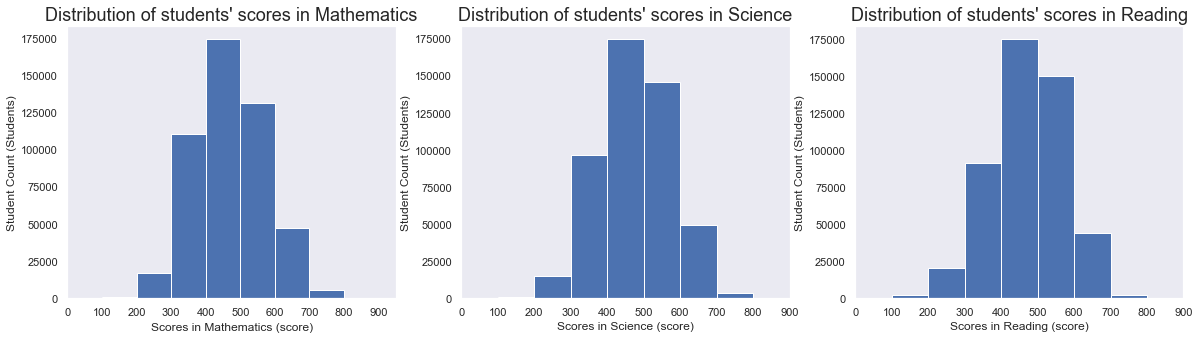

In [41]:
plt.figure(figsize=(20,5))

bins = np.arange(0,900+100,100)

plt.subplot(1,3,1)
plt.hist(data = pisa_2012_clean, x = 'Mathematics', bins = bins);
plt.xlim(50,950);
plt.xticks(bins);
plt.xlabel('Scores in Mathematics (score)');
plt.ylabel('Student Count (Students)');
plt.title("Distribution of students' scores in Mathematics", fontsize=18);
plt.grid(False);

plt.subplot(1,3,2)
plt.hist(data = pisa_2012_clean, x = 'Science', bins = bins);
plt.xlim(0,900);
plt.xticks(bins);
plt.xlabel('Scores in Science (score)');
plt.ylabel('Student Count (Students)');
plt.title("Distribution of students' scores in Science", fontsize=18);
plt.grid(False);

plt.subplot(1,3,3)
plt.hist(data = pisa_2012_clean, x = 'Reading', bins = bins);
plt.xlim(0,900);
plt.xticks(bins);
plt.xlabel('Scores in Reading (score)');
plt.ylabel('Student Count (Students)');
plt.title("Distribution of students' scores in Reading", fontsize=18);
plt.grid(False);

1. All three of the distributions of 'Mathematics','Science','Reading' form a unimodel.
2. All three plots are normally distributed.
3. The majority of students score between 300-600 marks.

### Distribution of students' scores across the three subject variables, using box plots.

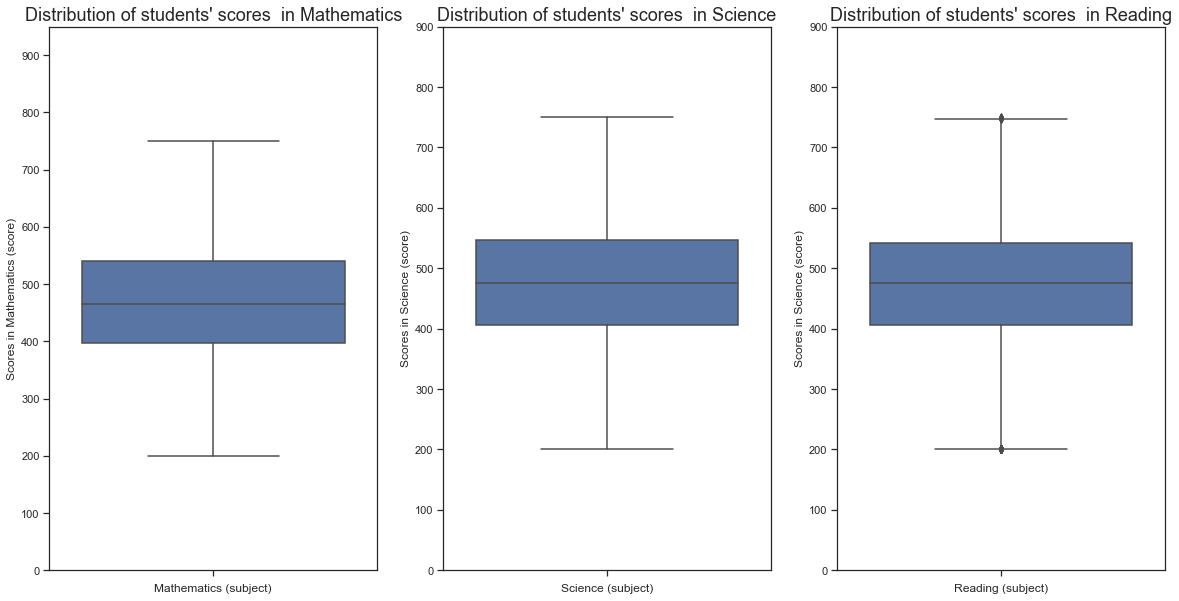

In [76]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sb.boxplot(data=pisa_2012_clean, y='Mathematics')
sb.set_style('ticks',{'axis.grid': False})
plt.ylim(50,950);
plt.yticks(bins);
plt.ylabel('Scores in Mathematics (score)');
plt.xlabel('Mathematics (subject)');
plt.title("Distribution of students' scores  in Mathematics", fontsize=18);

plt.subplot(1,3,2)
sb.set_style('ticks',{'axis.grid': False})
sb.boxplot(data=pisa_2012_clean, y='Science')
# sb.violinplot(data=pisa_2012_clean, y='Science')
plt.ylim(0,900);
plt.yticks(bins);
plt.ylabel('Scores in Science (score)');
plt.xlabel('Science (subject)');
plt.title("Distribution of students' scores  in Science", fontsize=18);

plt.subplot(1,3,3)
sb.set_style('ticks',{'axis.grid': False})
sb.boxplot(data=pisa_2012_clean, y='Reading')
# sb.violinplot(data=pisa_2012_clean, y='Reading')
plt.ylim(0,900);
plt.yticks(bins);
plt.ylabel('Scores in Science (score)');
plt.xlabel('Reading (subject)')
plt.title("Distribution of students' scores  in Reading", fontsize=18);

1. This box plot revealed many outliers. They have to be clean for bivariate and multivariate analysis.
2. The outliers are indicative of exceptionally poor and exceptionally gifted students.
3. Minute number of students score > 775 marks or score < 200 marks.

### Distribution of student count across all available countries using a bar plot.

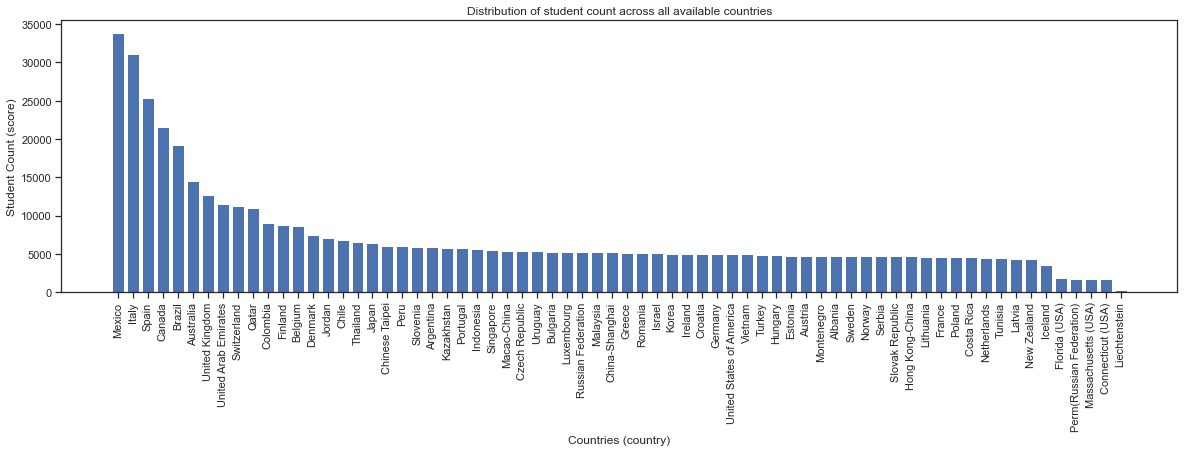

In [43]:
pisa_2012_clean['Country_Code'].value_counts()

country_index = (pisa_2012_clean['Country_Code'].value_counts().index).tolist()
country_values = (pisa_2012_clean['Country_Code'].value_counts().values).tolist()

plt.figure(figsize=(20,5))

plt.bar(country_index, country_values);
plt.xticks(rotation=90);
plt.xlabel('Countries (country)');
plt.ylabel('Student Count (score)');
plt.grid(False);
plt.title('Distribution of student count across all available countries');


1. Countries of Maxico, Italy, Spain, Canada, Brazil has the most number of students in the PISA 2012 dataset respectively. 
2. More than 15,000 students from these countries are represented in the data.

### Distribution of student count with reference to gender, using a bar plot.

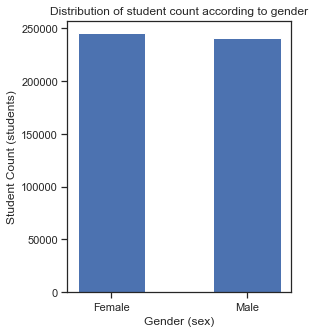

In [44]:
pisa_2012_clean['Gender'].value_counts()

gender_index = (pisa_2012_clean['Gender'].value_counts().index).tolist()
gender_values = (pisa_2012_clean['Gender'].value_counts().values).tolist()

plt.figure(figsize=(4,5))

plt.bar(gender_index, gender_values, width=0.5);
plt.title('Distribution of student count according to gender');
plt.xlabel('Gender (sex)');
plt.ylabel('Student Count (students)');
plt.grid(False);

Both the genders are equally represented in the PISA 2012 dataset.

### Distribution of the parents count on the bases of their education level, using bar plot

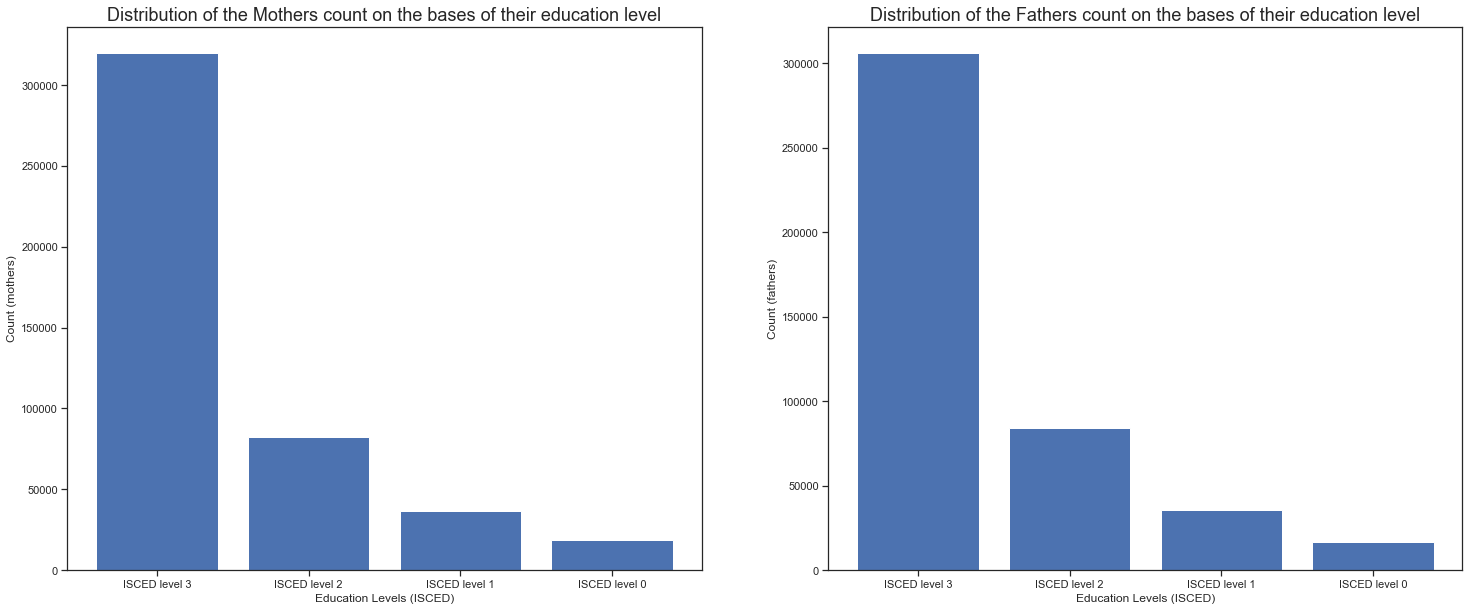

In [45]:
plt.figure(figsize=(25,10))

pisa_2012_clean_parents['Mother_Education'].value_counts()

mother_index = (pisa_2012_clean_parents['Mother_Education'].value_counts().index).tolist()
mother_values = (pisa_2012_clean_parents['Mother_Education'].value_counts().values).tolist()

plt.subplot(1,2,1)
plt.bar(mother_index, mother_values)
plt.ylabel('Count (mothers)');
plt.xlabel('Education Levels (ISCED)');
plt.title("Distribution of the Mothers count on the bases of their education level", fontsize=18);
plt.grid(False);

pisa_2012_clean_parents['Father_Education'].value_counts()

father_index = (pisa_2012_clean_parents['Father_Education'].value_counts().index).tolist()
father_values = (pisa_2012_clean_parents['Father_Education'].value_counts().values).tolist()

plt.subplot(1,2,2)
plt.bar(father_index, father_values);
plt.ylabel('Count (fathers)');
plt.xlabel('Education Levels (ISCED)');
plt.title("Distribution of the Fathers count on the bases of their education level", fontsize=18);
plt.grid(False);

1. Majority of parents have the ISCED Level 3 educational qualifications.
2. Both distributions are skewed to the right.
3. For bivariate and multivarfiate analysis the distribution among the different levels of education should be equal.

In [46]:
# Extracting exceptionally good students
exceptional_scores = 775
best_math_countries = pisa_2012_clean.loc[(pisa_2012_clean['Mathematics'] > exceptional_scores), 'Country_Code'].value_counts()
best_science_countries = pisa_2012_clean.loc[(pisa_2012_clean['Science'] > exceptional_scores), 'Country_Code'].value_counts()
best_reading_countries = pisa_2012_clean.loc[(pisa_2012_clean['Reading'] > exceptional_scores), 'Country_Code'].value_counts()

### Distribution of gifted students in Mathematics according to countries, using a bar plot.

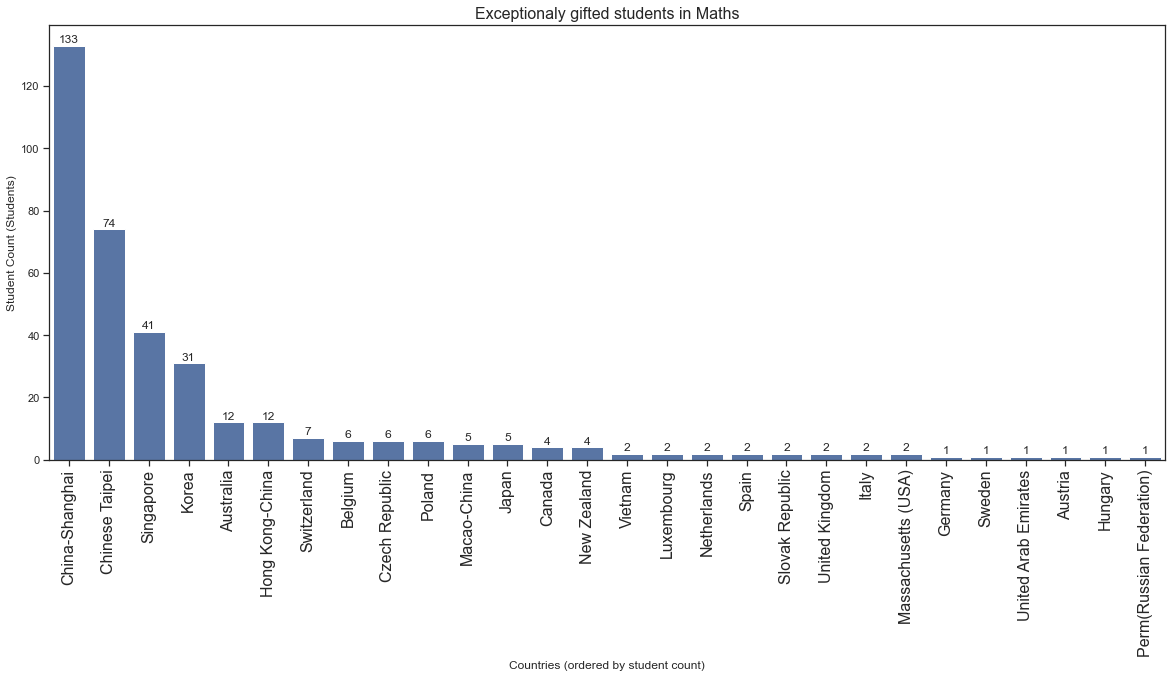

In [47]:
plt.figure(figsize=(20,8))
sb.barplot(x = best_math_countries.index, y = best_math_countries.values, color = color)
plt.title('Exceptionaly gifted students in Maths', fontsize=16);
plt.ylabel('Student Count (Students)');
plt.xlabel('Countries (ordered by student count)');
x_indexes = list(range(len(best_math_countries.index)))
x_labels = best_math_countries.index
y_indexes = (best_math_countries.values).tolist()
y_labels = [str(y) for y in y_indexes]
plt.xticks(x_indexes, x_labels, fontsize=16, rotation=90);

for y_index, x_index in zip(y_indexes, x_indexes):
    plt.text(x= x_index, y= y_index +1, s=y_index, ha='center', fontsize=12)
    
plt.grid(False);

As expected four of the top five countries with most number of exceptionally gifted students in maths are from Asia.

### Distribution of gifted students in Science according to countries, using a bar plot.

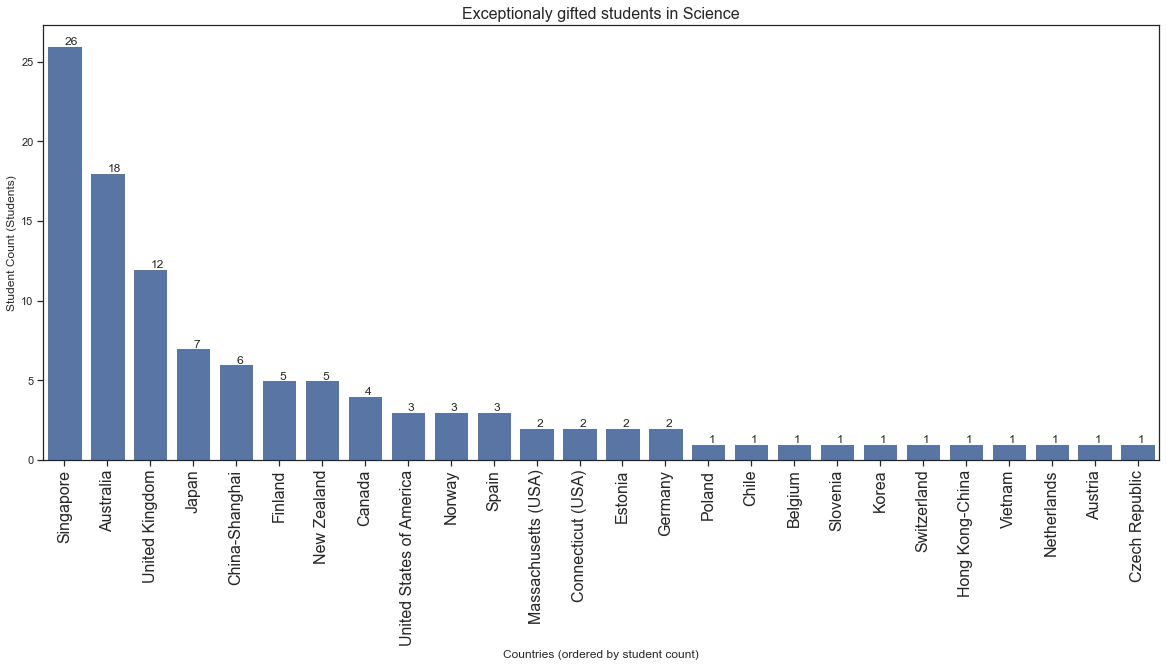

In [48]:
plt.figure(figsize=(20,8)) 
sb.barplot(x = best_science_countries.index, y = best_science_countries.values, color = color)
plt.title('Exceptionaly gifted students in Science', fontsize=16);
plt.ylabel('Student Count (Students)');
plt.xlabel('Countries (ordered by student count)');
x_indexes = list(range(len(best_science_countries.index)))
x_labels = best_science_countries.index
y_indexes = (best_science_countries.values).tolist()
y_labels = [str(y) for y in y_indexes]
plt.xticks(x_indexes, x_labels, fontsize=16, rotation=90);

for y_index, x_index in zip(y_indexes, x_indexes):
    plt.text(x= x_index, y= y_index + 0.25, s=y_index, va='center', fontsize=12)
    
plt.grid(False);

The top five countries with with most number of exceptionally gifted students in Science are from 'Singapore', 'Australia', United Kingdom, 'Japan', 'China-Shanghai' respectively.

### Distribution of gifted students in Reading according to countries, using a bar plot.

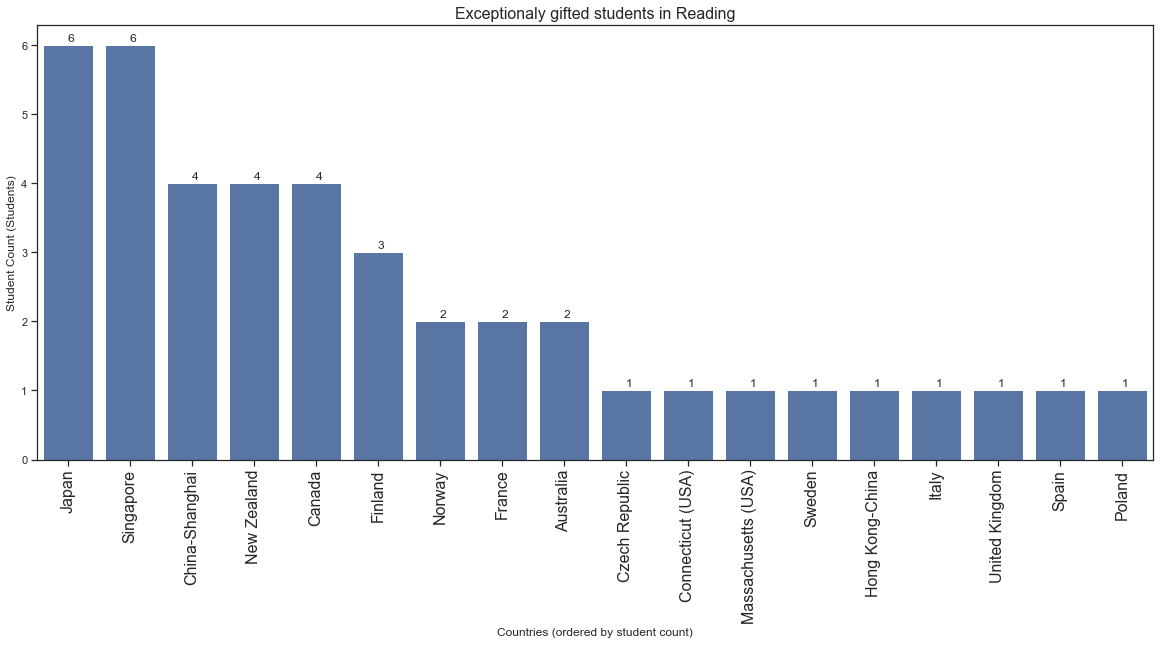

In [49]:
plt.figure(figsize=(20,8))

sb.barplot(x = best_reading_countries.index, y = best_reading_countries.values, color = color)
plt.title('Exceptionaly gifted students in Reading', fontsize=16);
plt.ylabel('Student Count (Students)');
plt.xlabel('Countries (ordered by student count)');
x_indexes = list(range(len(best_reading_countries.index)))
x_labels = best_reading_countries.index
y_indexes = (best_reading_countries.values).tolist()
y_labels = [str(y) for y in y_indexes]
plt.xticks(x_indexes, x_labels, fontsize=16, rotation=90);

for y_index, x_index in zip(y_indexes, x_indexes):
    plt.text(x= x_index, y= y_index +0.1, s=y_index, va='center', fontsize=12)
    
plt.grid(False);

The top five countries with most number of exceptionally gifted students in Reading are from 'Japan', 'Singapore', 'New Zealand', 'Canada', 'China-Shanghai' respectively.

In [50]:
# Extracting poor students
poor_scores = 200
least_math_countries = pisa_2012_clean.loc[(pisa_2012_clean['Mathematics'] < poor_scores), 'Country_Code'].value_counts()
least_science_countries = pisa_2012_clean.loc[(pisa_2012_clean['Science'] < poor_scores), 'Country_Code'].value_counts()
least_reading_countries = pisa_2012_clean.loc[(pisa_2012_clean['Reading'] < poor_scores), 'Country_Code'].value_counts()

### Distribution of poor students in Mathematics according to countries, using a bar plot.

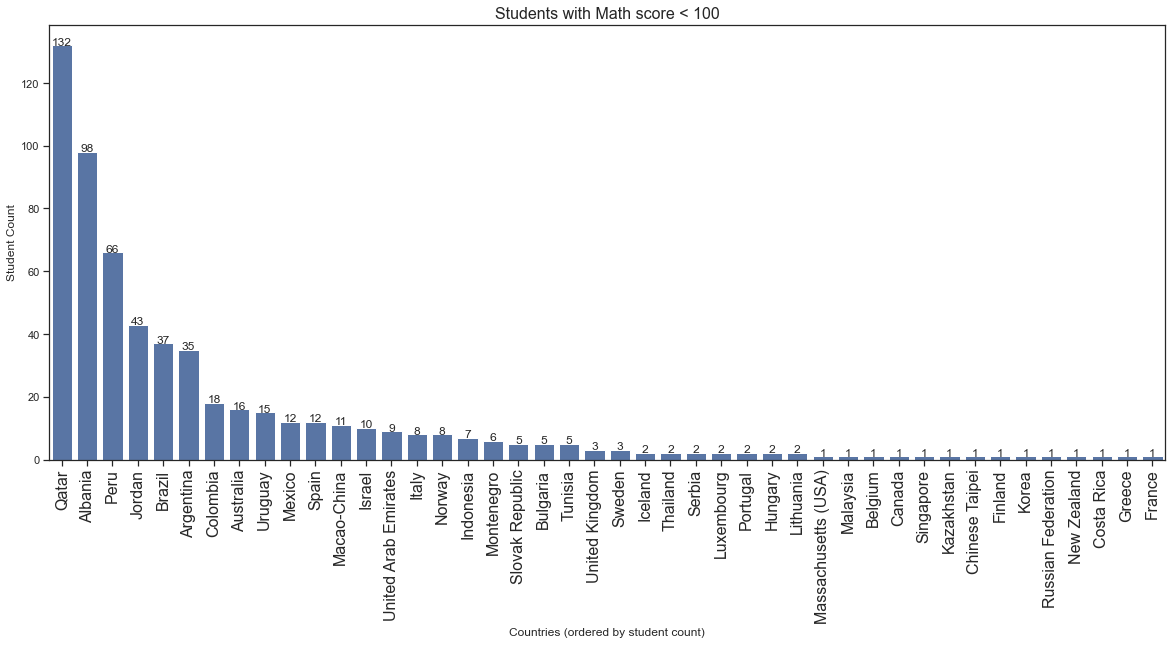

In [51]:
plt.figure(figsize=(20,8))



sb.barplot(x = least_math_countries.index, y = least_math_countries.values, color = color)
plt.title('Students with Math score < 100', fontsize=16);
plt.ylabel('Student Count')
plt.xlabel('Countries (ordered by student count)')
x_indexes = list(range(len(least_math_countries.index)))
x_labels = least_math_countries.index
y_indexes = (least_math_countries.values).tolist()
y_labels = [str(y) for y in y_indexes]
plt.xticks(x_indexes, x_labels, fontsize=16, rotation=90)

for y_index, x_index in zip(y_indexes, x_indexes):
    plt.text(x= x_index, y= y_index + 0.1, s=y_index, ha='center', fontsize=12)
    
plt.grid(False);

### Distribution of poor students in Science according to countries, using a bar plot.

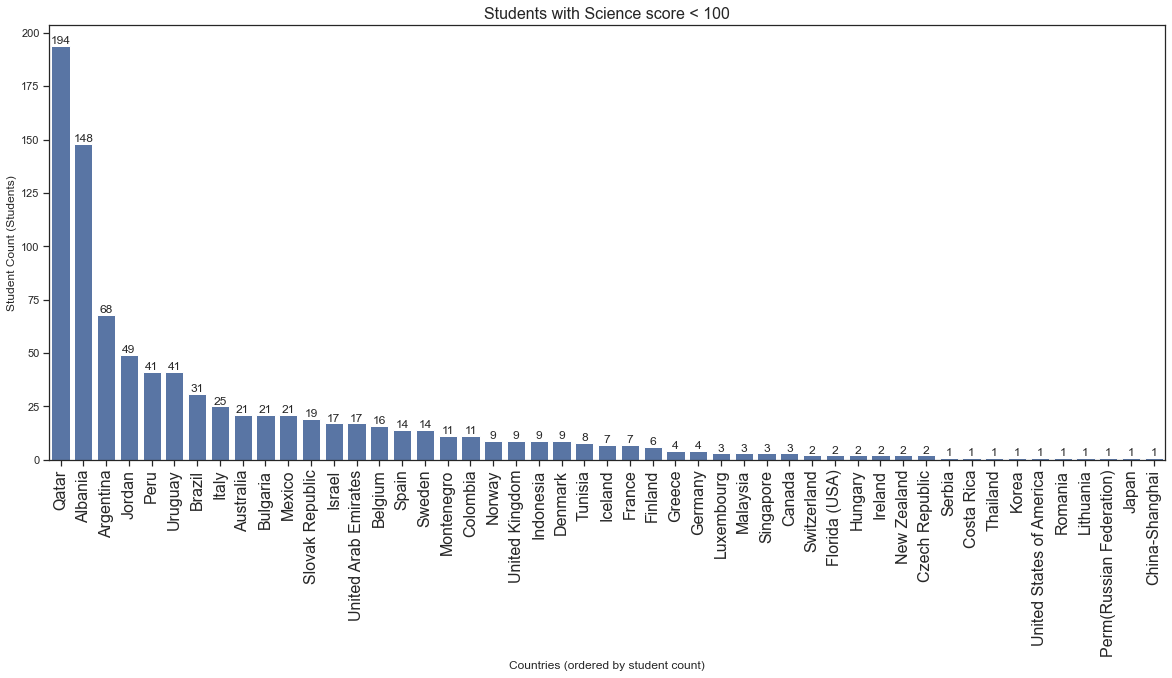

In [52]:
plt.figure(figsize=(20,8))

sb.barplot(x = least_science_countries.index, y = least_science_countries.values, color = color)
plt.title('Students with Science score < 100', fontsize=16);
plt.ylabel('Student Count (Students)')
plt.xlabel('Countries (ordered by student count)')
x_indexes = list(range(len(least_science_countries.index)))
x_labels = least_science_countries.index
y_indexes = (least_science_countries.values).tolist()
y_labels = [str(y) for y in y_indexes]
plt.xticks(x_indexes, x_labels, fontsize=16, rotation=90)

for y_index, x_index in zip(y_indexes, x_indexes):
    plt.text(x= x_index, y= y_index + 1, s=y_index, ha='center', fontsize=12)
    
plt.grid(False);

### Distribution of poor students in Reading according to countries, using a bar plot.

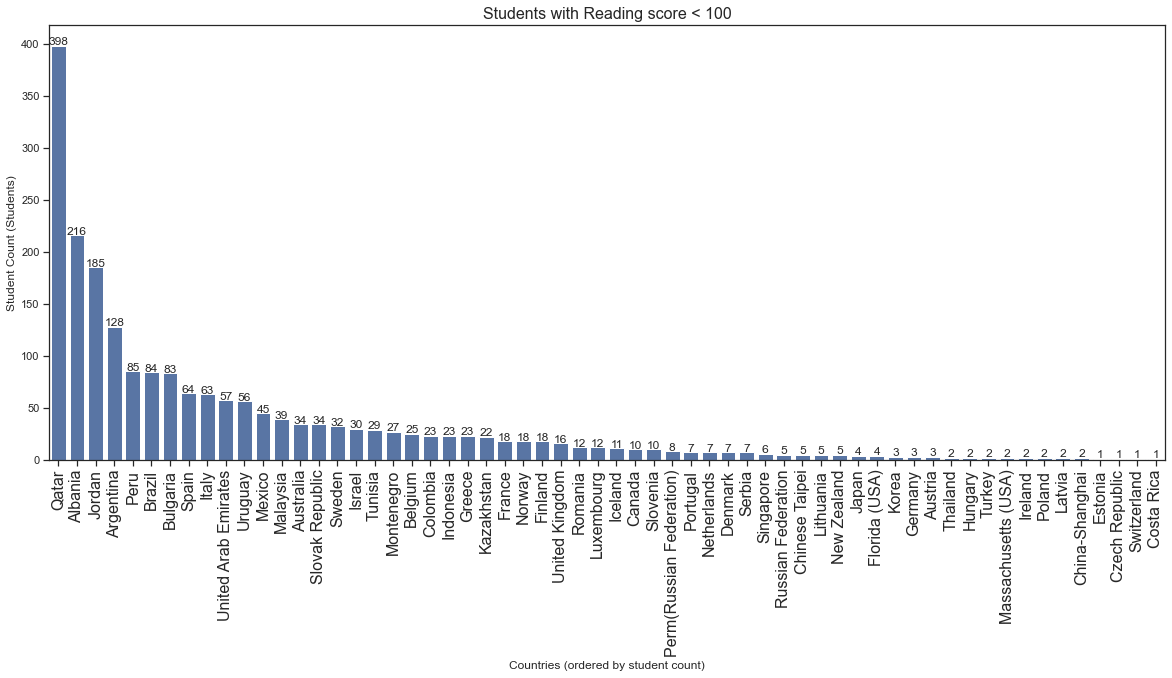

In [53]:
plt.figure(figsize=(20,8))

sb.barplot(x = least_reading_countries.index, y = least_reading_countries.values, color = color)
plt.title('Students with Reading score < 100', fontsize=16);
plt.ylabel('Student Count (Students)')
plt.xlabel('Countries (ordered by student count)')
x_indexes = list(range(len(least_reading_countries.index)))
x_labels = least_reading_countries.index
y_indexes = (least_reading_countries.values).tolist()
y_labels = [str(y) for y in y_indexes]
plt.xticks(x_indexes, x_labels, fontsize=16, rotation=90)


for y_index, x_index in zip(y_indexes, x_indexes):
     plt.text(x= x_index, y= y_index +0.75, s=y_index, ha='center', fontsize=12)
        
plt.grid(False);

The top two countries with the most poor scoring students are 'Qatar' and 'Albania' respectively.

### Cleaning variables

#### Removing outliers

In [54]:
# Removing outliers

exceptional_scores = 750
poor_score = 200

pisa_2012_clean = pisa_2012_clean.loc[(pisa_2012_clean['Mathematics']<exceptional_scores)&(pisa_2012_clean['Mathematics']>poor_scores), :]
pisa_2012_clean = pisa_2012_clean.loc[(pisa_2012_clean['Science']<exceptional_scores)&(pisa_2012_clean['Science']>poor_scores), :]
pisa_2012_clean = pisa_2012_clean.loc[(pisa_2012_clean['Reading']<exceptional_scores)&(pisa_2012_clean['Reading']>poor_scores), :]



pisa_2012_clean_parents = pisa_2012_clean_parents.loc[(pisa_2012_clean_parents['Mathematics']<exceptional_scores)&(pisa_2012_clean_parents['Mathematics']>poor_scores), :]
pisa_2012_clean_parents = pisa_2012_clean_parents.loc[(pisa_2012_clean_parents['Science']<exceptional_scores)&(pisa_2012_clean_parents['Science']>poor_scores), :]
pisa_2012_clean_parents = pisa_2012_clean_parents.loc[(pisa_2012_clean_parents['Reading']<exceptional_scores)&(pisa_2012_clean_parents['Reading']>poor_scores), :]

pisa_2012_clean_friends = pisa_2012_clean_friends.loc[(pisa_2012_clean_friends['Mathematics']<exceptional_scores)&(pisa_2012_clean_friends['Mathematics']>poor_scores), :]
pisa_2012_clean_friends = pisa_2012_clean_friends.loc[(pisa_2012_clean_friends['Science']<exceptional_scores)&(pisa_2012_clean_friends['Science']>poor_scores), :]
pisa_2012_clean_friends = pisa_2012_clean_friends.loc[(pisa_2012_clean_friends['Reading']<exceptional_scores)&(pisa_2012_clean_friends['Reading']>poor_scores), :]

pisa_2012_clean_books = pisa_2012_clean_books.loc[(pisa_2012_clean['Mathematics']<exceptional_scores)&(pisa_2012_clean_books['Mathematics']>poor_scores), :]
pisa_2012_clean_books = pisa_2012_clean_books.loc[(pisa_2012_clean['Science']<exceptional_scores)&(pisa_2012_clean_books['Science']>poor_scores), :]
pisa_2012_clean_books = pisa_2012_clean_books.loc[(pisa_2012_clean['Reading']<exceptional_scores)&(pisa_2012_clean_books['Reading']>poor_scores), :]

#### Test

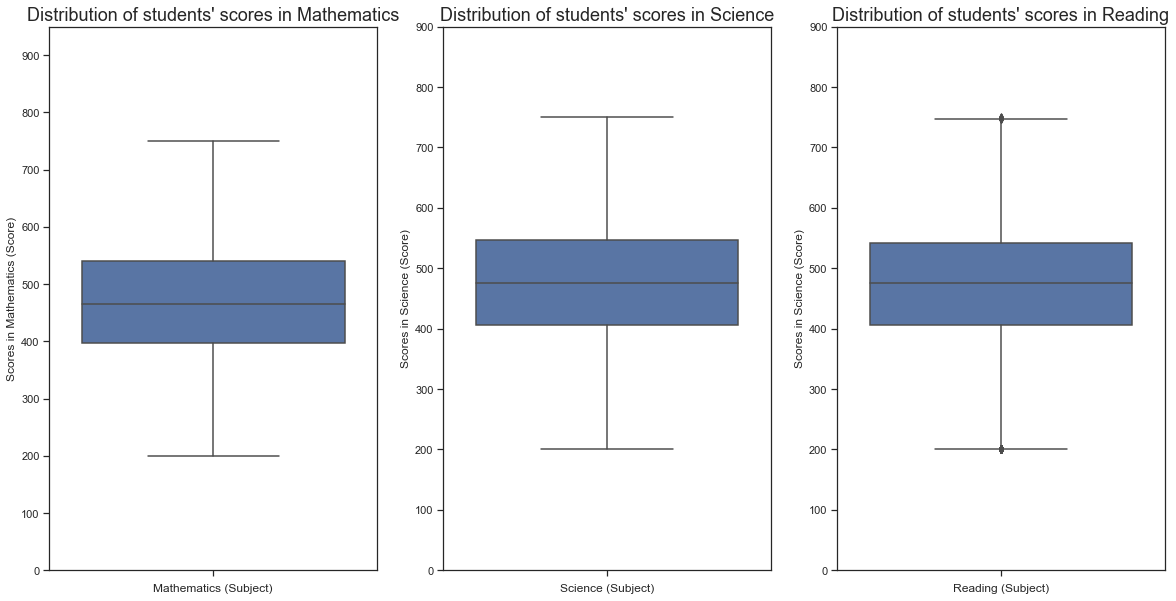

In [55]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sb.set_style('ticks',{'axis.grid': False})
sb.boxplot(data=pisa_2012_clean, y='Mathematics')
# sb.violinplot(data=pisa_2012_clean, y='Mathematics')
plt.ylim(50,950);
plt.yticks(bins);
plt.ylabel('Scores in Mathematics (Score)');
plt.xlabel('Mathematics (Subject)');
plt.title("Distribution of students' scores in Mathematics", fontsize=18);

plt.subplot(1,3,2)
sb.set_style('ticks',{'axis.grid': False})
sb.boxplot(data=pisa_2012_clean, y='Science')
# sb.violinplot(data=pisa_2012_clean, y='Science')
plt.ylim(0,900);
plt.yticks(bins);
plt.ylabel('Scores in Science (Score)');
plt.xlabel('Science (Subject)');
plt.title("Distribution of students' scores in Science", fontsize=18);

plt.subplot(1,3,3)
sb.set_style('ticks',{'axis.grid': False})
sb.boxplot(data=pisa_2012_clean, y='Reading')
# sb.violinplot(data=pisa_2012_clean, y='Reading')
plt.ylim(0,900);
plt.yticks(bins);
plt.ylabel('Scores in Science (Score)');
plt.xlabel('Reading (Subject)');
plt.title("Distribution of students' scores in Reading", fontsize=18);

#### Fixing parents distribution

In [56]:
min_length_mother = min(pisa_2012_clean_parents['Mother_Education'].value_counts())
min_length_father = min(pisa_2012_clean_parents['Father_Education'].value_counts())
min_length_mother,min_length_father

(18506, 16308)

In [57]:
import random
my_pisa_2012_clean_mother = pd.DataFrame()
e_levels=list(pd.unique(pisa_2012_clean_parents['Mother_Education']))
e_levels.remove(np.nan)


for e_level in e_levels:

    population = pisa_2012_clean_parents[pisa_2012_clean_parents['Mother_Education'] ==e_level]
    sample_mother_index = random.sample(list(population.index),min_length_mother)
    x = pisa_2012_clean_parents.loc[sample_mother_index,:]
    my_pisa_2012_clean_mother= my_pisa_2012_clean_mother.append(x)

In [58]:
my_pisa_2012_clean_father = pd.DataFrame()
e_levels=list(pd.unique(pisa_2012_clean_parents['Father_Education']))
e_levels.remove(np.nan)

for e_level in e_levels:
    population = pisa_2012_clean_parents[pisa_2012_clean_parents['Father_Education'] ==e_level]
    sample_mother_index = random.sample(list(population.index),min_length_father)
    x = pisa_2012_clean_parents.loc[sample_mother_index,:]
    my_pisa_2012_clean_father= my_pisa_2012_clean_father.append(x)

#### Test

In [59]:
my_pisa_2012_clean_mother['Mother_Education'].value_counts(),my_pisa_2012_clean_father['Father_Education'].value_counts()

(ISCED level 0    18506
 ISCED level 1    18506
 ISCED level 2    18506
 ISCED level 3    18506
 Name: Mother_Education, dtype: int64,
 ISCED level 0    16308
 ISCED level 1    16308
 ISCED level 2    16308
 ISCED level 3    16308
 Name: Father_Education, dtype: int64)

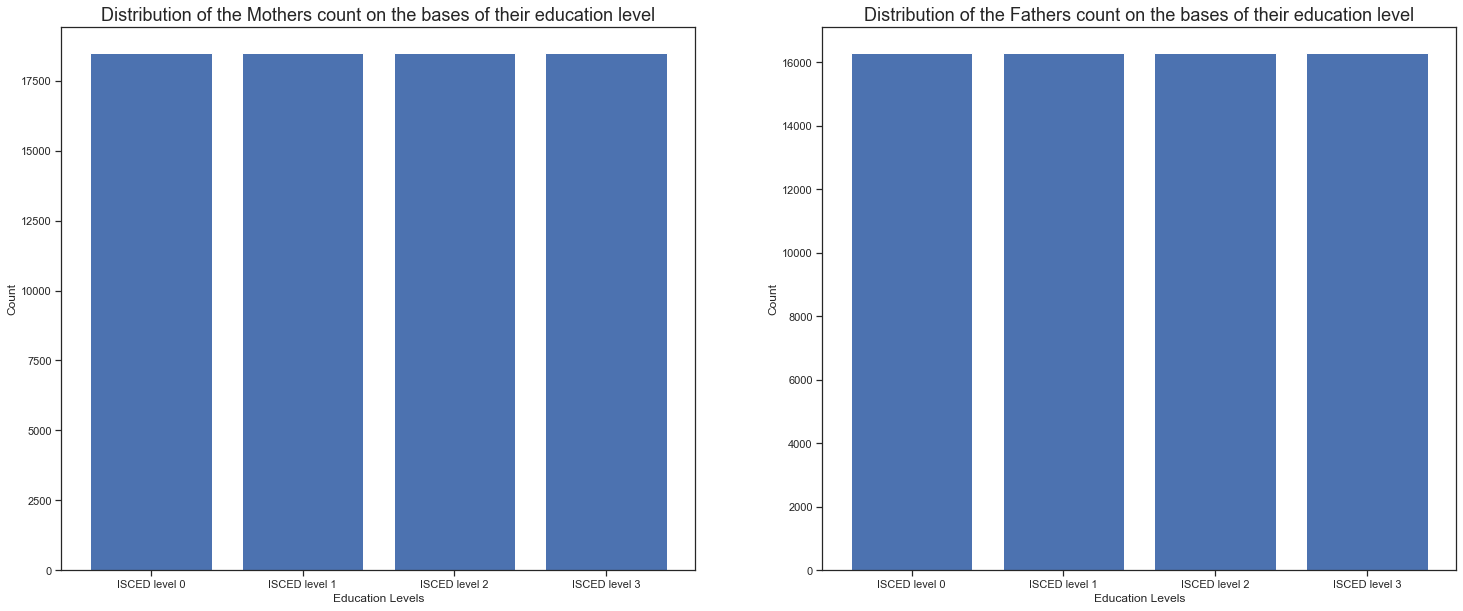

In [60]:
plt.figure(figsize=(25,10))

my_pisa_2012_clean_mother['Mother_Education'].value_counts()

mother_index = (my_pisa_2012_clean_mother['Mother_Education'].value_counts().index).tolist()
mother_values = (my_pisa_2012_clean_mother['Mother_Education'].value_counts().values).tolist()

plt.subplot(1,2,1)
plt.bar(mother_index, mother_values)
plt.ylabel('Count');
plt.xlabel('Education Levels');
plt.title("Distribution of the Mothers count on the bases of their education level", fontsize=18);
plt.grid(False);


my_pisa_2012_clean_father['Father_Education'].value_counts()

father_index = (my_pisa_2012_clean_father['Father_Education'].value_counts().index).tolist()
father_values = (my_pisa_2012_clean_father['Father_Education'].value_counts().values).tolist()

plt.subplot(1,2,2)
plt.bar(father_index, father_values)
plt.ylabel('Count');
plt.xlabel('Education Levels');
plt.title("Distribution of the Fathers count on the bases of their education level", fontsize=18);
plt.grid(False);

### Summary of univariate exploration

1. The plots for the three subjects of Mathematics, Science and Reading are all normally distributed.
2. The distribution for countries and the educational level of the parents are skewed to the right.
3. Uniform sampling was performed to make the distribution between different levels of educations for parents uniform.
4. Removed outliers for the target variables aka. student scores.

## Bivariate Exploration


In [61]:
pisa_2012_gender = pisa_2012_clean.groupby('Gender')[['Mathematics','Science','Reading']].mean()
pisa_2012_gender

,Mathematics,Science,Reading
Gender,,,
Female,464.062136,475.502356,489.956224
Male,476.187241,477.387583,455.398394


### Distribution of mean scores according to the three subject variables accross gender using bar plot.

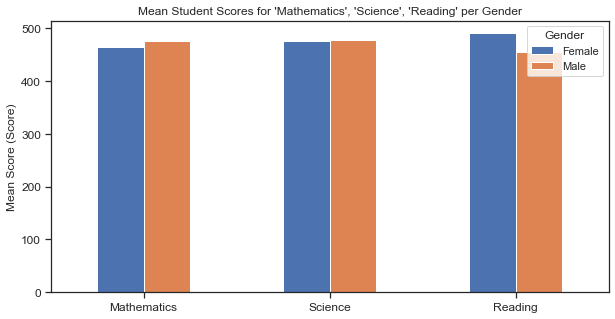

In [62]:
pisa_2012_gender.T.plot(kind='bar', title ="Mean Student Scores for 'Mathematics', 'Science', 'Reading' per Gender", figsize=(10, 5), legend=True, fontsize=12)
plt.ylabel('Mean Score (Score)');
plt.xticks(rotation=0);
plt.grid(False);

Although the overall performance of students across genders is same. However, females tend to perform better at Reading while males perform better at Mathematics.

In [63]:
pisa_2012_mother = my_pisa_2012_clean_mother.groupby('Mother_Education')[['Mathematics','Science','Reading']].mean()
pisa_2012_mother.columns.name ='Subjects'

pisa_2012_father = my_pisa_2012_clean_father.groupby('Father_Education')[['Mathematics','Science','Reading']].mean()
pisa_2012_father.columns.name ='Subjects'

### Distribution of mean score for the three subject variable acoording to the education levels of parents using line plot.

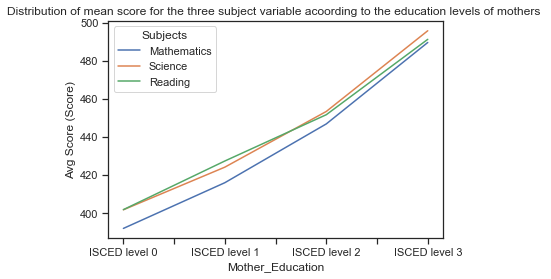

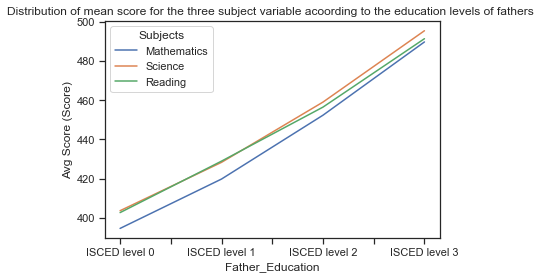

In [64]:
# plt.plot(pisa_2012_mother.index, pisa_2012_mother[['Mathematics','Science','Reading']]);
# plt.legend()

pisa_2012_mother.plot()
plt.ylabel('Avg Score (Score)')
plt.grid(False);
plt.title('Distribution of mean score for the three subject variable acoording to the education levels of mothers ');

pisa_2012_father.plot()
plt.ylabel('Avg Score (Score)')
plt.grid(False);

plt.title('Distribution of mean score for the three subject variable acoording to the education levels of fathers ');

An increase in the level of education of parents reflects positively on stdent scores.

### Distribution of mean score for the three subject variable acoording to the number of books available at home, using line plot.

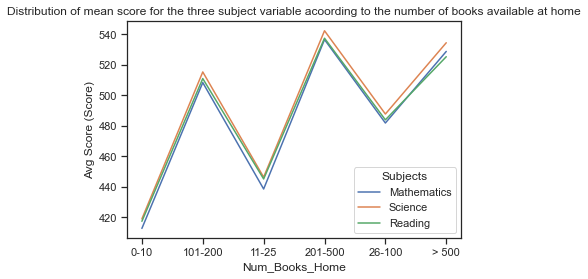

In [65]:
pisa_2012_books = pisa_2012_clean_books.groupby('Num_Books_Home')[['Mathematics','Science','Reading']].mean()
pisa_2012_books.columns.name ='Subjects'

pisa_2012_books.plot();
plt.ylabel('Avg Score (Score)');
plt.grid(False);
plt.title('Distribution of mean score for the three subject variable acoording to the number of books available at home');

Surprisingly the relationship between number of book present at home and student performance is not directly proportional.

### Distribution of mean score for Mathematics acoording to the proficiency of friends in Mathematics, using line plot.

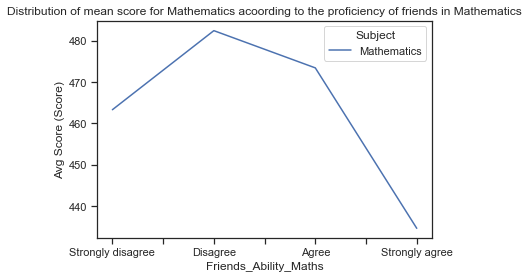

In [66]:
pisa_2012_friends = pisa_2012_clean_friends.groupby('Friends_Ability_Maths')[['Mathematics']].mean()
pisa_2012_friends.columns.name ='Subject'

pisa_2012_friends.plot();
plt.ylabel('Avg Score (Score)');
plt.grid(False);
plt.title('Distribution of mean score for Mathematics acoording to the proficiency of friends in Mathematics');

Students having friends with average performance in Mathematics are observed to have the best Mathematics scores.

### Summary of bivariate exploration

1. Number of books at home is not linearly correlated with student scores.
2. Friends proficiency in Mathematics is not directly proportional to Mathematic scores.
3. Patients' education levels are directly proportional to students' scores.

## Multivariate Exploration

In [67]:
my_pisa_2012_clean_mother.head()

,Country_Code,Birth_Year,Gender,Mother_Education,Father_Education,Num_Books_Home,Friends_Ability_Maths,Age,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Mathematics,Reading,Science
311419,Macao-China,1996,Female,ISCED level 3,ISCED level 3,0-10,Data Missing,15.58,333.0036,319.7616,234.0785,311.9723,274.5833,335.6000,314.9479,304.6219,326.0682,297.4731,363.4278,364.3603,308.4110,344.7781,355.9679,294.67986,315.74222,347.38902
389374,Qatar,1996,Female,ISCED level 3,ISCED level 3,11-25,Data Missing,15.58,228.9375,182.2013,216.4745,270.2212,154.1595,220.9016,195.4837,188.3349,214.5471,205.0154,175.0653,228.2171,283.2339,292.5587,227.2846,210.39880,204.85654,241.27192
288597,Kazakhstan,1996,Female,ISCED level 3,ISCED level 3,11-25,Disagree,15.75,393.6828,376.5462,387.4513,424.0614,378.1041,363.6391,348.5472,354.9017,392.2343,380.3196,367.7173,367.7173,351.8650,393.8269,346.2700,391.96916,367.92838,365.47930
224719,Indonesia,1996,Female,ISCED level 3,ISCED level 3,11-25,Strongly agree,16.33,367.1210,349.2055,310.2586,392.0470,359.3317,400.4951,443.3879,349.6593,414.7927,386.1975,404.1775,359.4181,364.0806,401.3801,316.5237,355.59276,398.90650,369.11600
118732,Colombia,1996,Male,ISCED level 3,ISCED level 3,11-25,Strongly disagree,15.58,449.7663,425.6193,420.9456,438.0823,464.5661,328.7792,457.8924,379.3018,465.9118,449.8729,372.1000,456.0239,407.5345,470.0112,470.9437,439.79592,416.35162,435.32266


### Distribution of the student scores for the three subject variables according to the educational level of parents keeping gender in mind, using box plots.

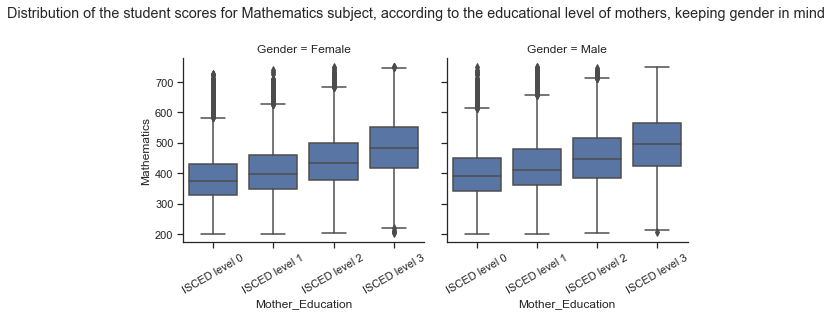

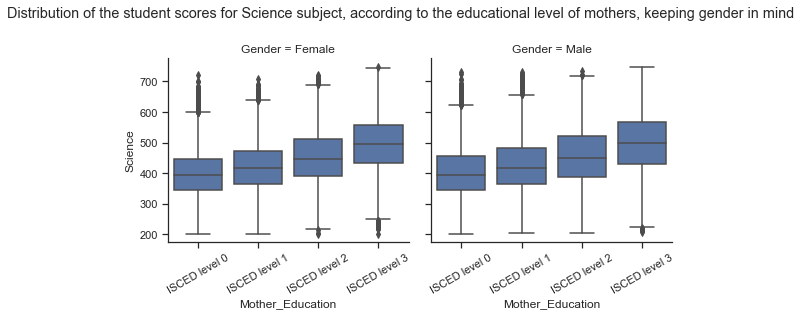

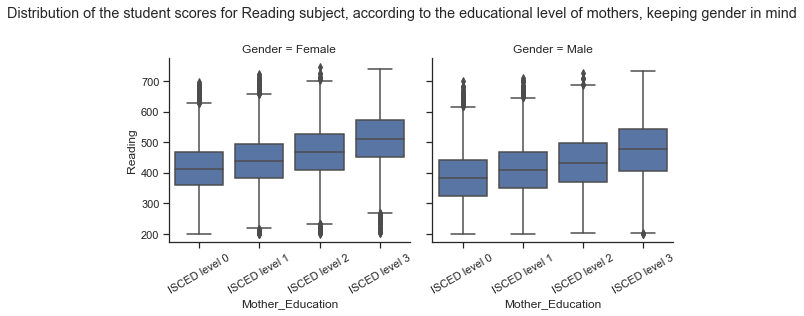

In [68]:
sb.set_style('ticks',{'axis.grid': False})


g = sb.FacetGrid(data = my_pisa_2012_clean_mother, col = 'Gender', size = 4)
g.map(sb.boxplot, 'Mother_Education', 'Mathematics');
g.set_xticklabels(rotation=30)


sb.set_style('ticks',{'axis.grid': False})
g.fig.suptitle('Distribution of the student scores for Mathematics subject, according to the educational level of mothers, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);


g = sb.FacetGrid(data = my_pisa_2012_clean_mother, col = 'Gender', size = 4)
g.map(sb.boxplot, 'Mother_Education', 'Science');
g.set_xticklabels(rotation=30)


sb.set_style('ticks',{'axis.grid': False})
g.fig.suptitle('Distribution of the student scores for Science subject, according to the educational level of mothers, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);


g = sb.FacetGrid(data = my_pisa_2012_clean_mother, col = 'Gender', size = 4)
g.map(sb.boxplot, 'Mother_Education', 'Reading');
g.set_xticklabels(rotation=30);

g.fig.suptitle('Distribution of the student scores for Reading subject, according to the educational level of mothers, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);



There is no genter wise discrimination in the relationship between mothers' education and student scores.

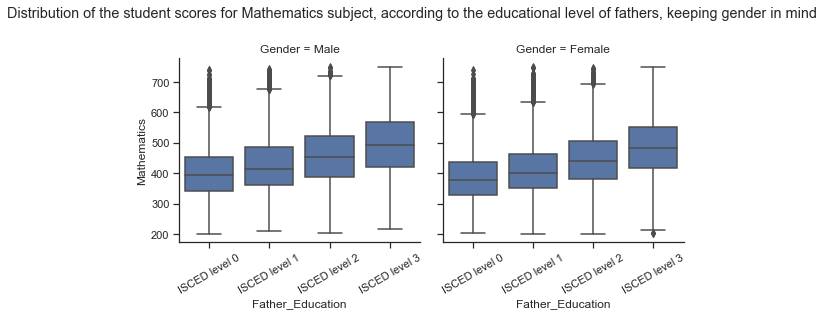

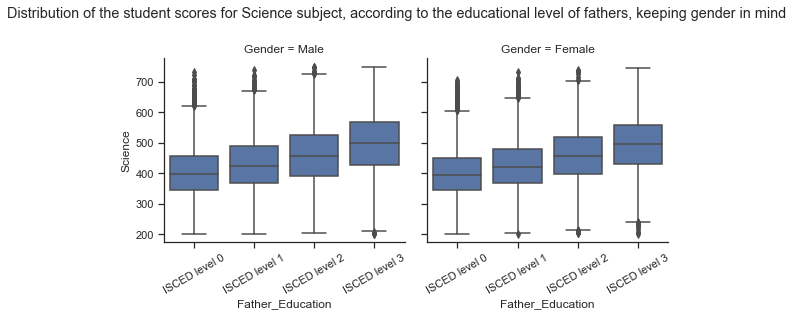

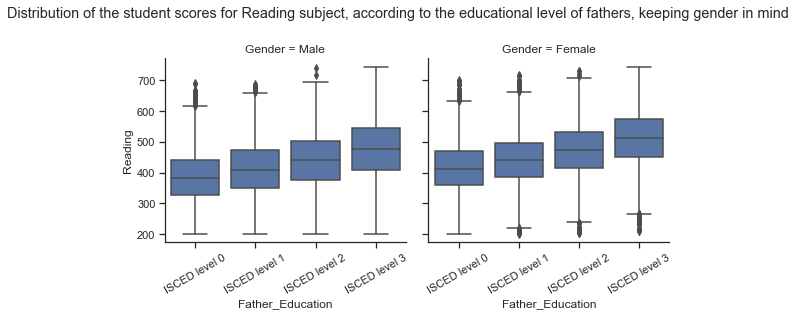

In [69]:
sb.set_style('ticks',{'axis.grid': False})


g = sb.FacetGrid(data = my_pisa_2012_clean_father, col = 'Gender', size = 4);
g.map(sb.boxplot, 'Father_Education', 'Mathematics');
g.set_xticklabels(rotation=30)
sb.set_style('ticks',{'axis.grid': False})
g.fig.suptitle('Distribution of the student scores for Mathematics subject, according to the educational level of fathers, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);



g = sb.FacetGrid(data = my_pisa_2012_clean_father, col = 'Gender', size = 4);
g.map(sb.boxplot, 'Father_Education', 'Science');
g.set_xticklabels(rotation=30)
g.fig.suptitle('Distribution of the student scores for Science subject, according to the educational level of fathers, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);



sb.set_style('ticks',{'axis.grid': False})


g = sb.FacetGrid(data = my_pisa_2012_clean_father, col = 'Gender', size = 4);
g.map(sb.boxplot, 'Father_Education', 'Reading');
g.set_xticklabels(rotation=30);
g.fig.suptitle('Distribution of the student scores for Reading subject, according to the educational level of fathers, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);


There is no genter wise discrimination in the relationship between fathers' education and student scores.

In [70]:
pisa_2012_clean_books.head()

,Country_Code,Birth_Year,Gender,Mother_Education,Father_Education,Num_Books_Home,Friends_Ability_Maths,Age,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Mathematics,Reading,Science
0,Albania,1996,Female,ISCED level 3,ISCED level 3,0-10,Disagree,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348
1,Albania,1996,Female,ISCED level 3,ISCED level 3,201-500,Strongly agree,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382
2,Albania,1996,Female,ISCED level 3,ISCED level 3,> 500,Strongly agree,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946
3,Albania,1996,Female,ISCED level 3,ISCED level 3,11-25,Data Missing,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,449.45476,477.46376,453.97240
4,Albania,1996,Female,ISCED level 0,ISCED level 3,101-200,Strongly agree,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,256.01010,367.15778


### Distribution of the student scores for the three subject variables according to the number of books available at home keeping gender in mind, using box plots.

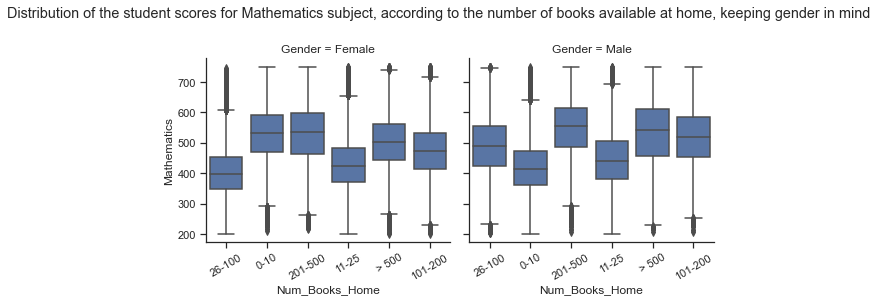

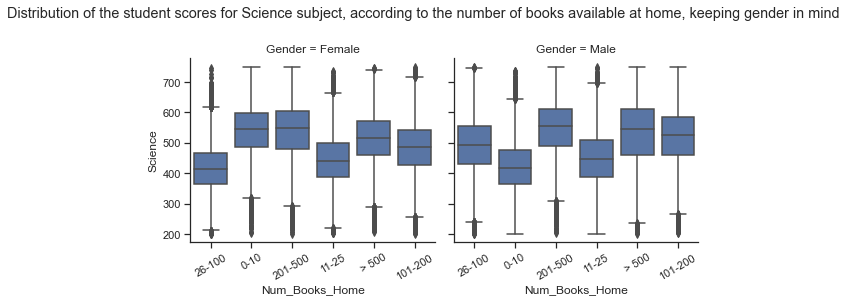

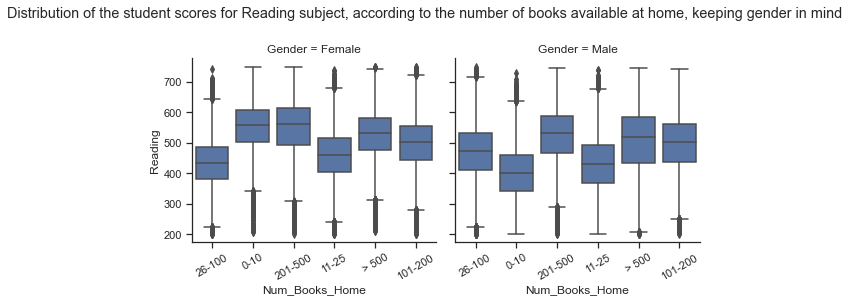

In [71]:
sb.set_style('ticks',{'axis.grid': False})

g = sb.FacetGrid(data = pisa_2012_clean_books, col = 'Gender', size = 4);
g.map(sb.boxplot, 'Num_Books_Home', 'Mathematics');
g.set_xticklabels(rotation=30)


sb.set_style('ticks',{'axis.grid': False})
g.fig.suptitle('Distribution of the student scores for Mathematics subject, according to the number of books available at home, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);



g = sb.FacetGrid(data = pisa_2012_clean_books, col = 'Gender', size = 4);
g.map(sb.boxplot, 'Num_Books_Home', 'Science');
g.set_xticklabels(rotation=30)
g.fig.suptitle('Distribution of the student scores for Science subject, according to the number of books available at home, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);


sb.set_style('ticks',{'axis.grid': False})


g = sb.FacetGrid(data = pisa_2012_clean_books, col = 'Gender', size = 4);
g.map(sb.boxplot, 'Num_Books_Home', 'Reading');
g.set_xticklabels(rotation=30);
g.fig.suptitle('Distribution of the student scores for Reading subject, according to the number of books available at home, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);

There is no genter wise discrimination in the relationship between number of books at home and student scores.

In [72]:
pisa_2012_clean_friends.head()

,Country_Code,Birth_Year,Gender,Mother_Education,Father_Education,Num_Books_Home,Friends_Ability_Maths,Age,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Mathematics,Reading,Science
0,Albania,1996,Female,ISCED level 3,ISCED level 3,0-10,Disagree,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348
1,Albania,1996,Female,ISCED level 3,ISCED level 3,201-500,Strongly agree,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382
2,Albania,1996,Female,ISCED level 3,ISCED level 3,> 500,Strongly agree,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946
4,Albania,1996,Female,ISCED level 0,ISCED level 3,101-200,Strongly agree,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,256.01010,367.15778
7,Albania,1996,Male,ISCED level 3,ISCED level 3,26-100,Agree,15.83,576.5773,516.5992,532.9568,549.3145,535.2937,567.7589,465.1099,431.4282,535.6811,582.9958,611.2831,596.3633,554.4013,513.3719,519.8993,542.14830,516.59478,559.06378


### Distribution of the student scores for Mathematics according to the proficiency of friends in Mathematics keeping gender in mind, using box plots.

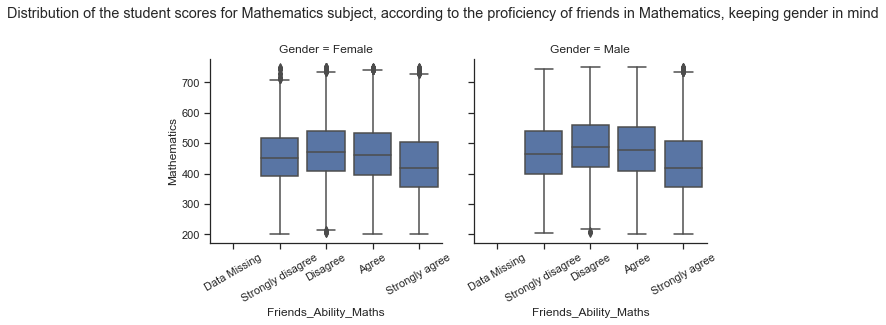

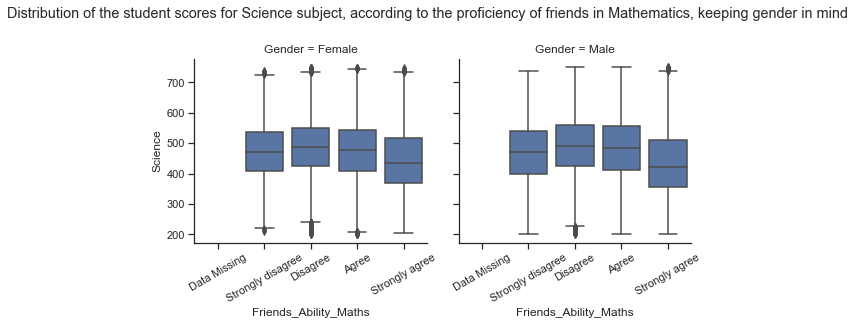

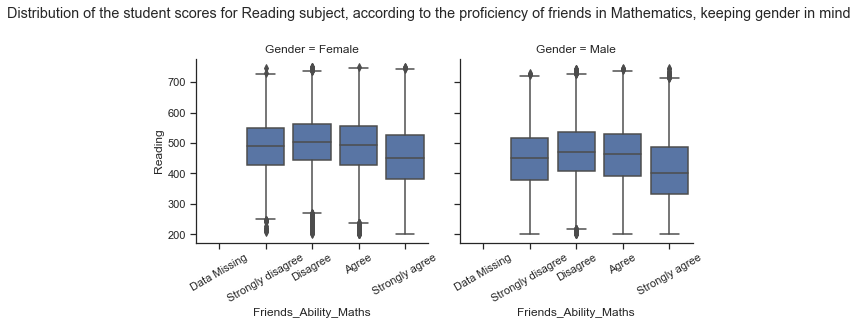

In [73]:
sb.set_style('ticks',{'axis.grid': False})

g = sb.FacetGrid(data = pisa_2012_clean_friends, col = 'Gender', size = 4);
g.map(sb.boxplot, 'Friends_Ability_Maths', 'Mathematics');
g.set_xticklabels(rotation=30)


sb.set_style('ticks',{'axis.grid': False})
g.fig.suptitle('Distribution of the student scores for Mathematics subject, according to the proficiency of friends in Mathematics, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);

g = sb.FacetGrid(data = pisa_2012_clean_friends, col = 'Gender', size = 4);
g.map(sb.boxplot, 'Friends_Ability_Maths', 'Science');
g.set_xticklabels(rotation=30)
g.fig.suptitle('Distribution of the student scores for Science subject, according to the proficiency of friends in Mathematics, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);



sb.set_style('ticks',{'axis.grid': False})

g = sb.FacetGrid(data = pisa_2012_clean_friends, col = 'Gender', size = 4);
g.map(sb.boxplot, 'Friends_Ability_Maths', 'Reading');
g.set_xticklabels(rotation=30);
g.fig.suptitle('Distribution of the student scores for Reading subject, according to the proficiency of friends in Mathematics, keeping gender in mind')
g.fig.subplots_adjust(top=0.8);


There is no genter wise discrimination in the influence of friends on student scores.

### Distribution of the three subject variables with respect to each other, using scatter and hist plots.

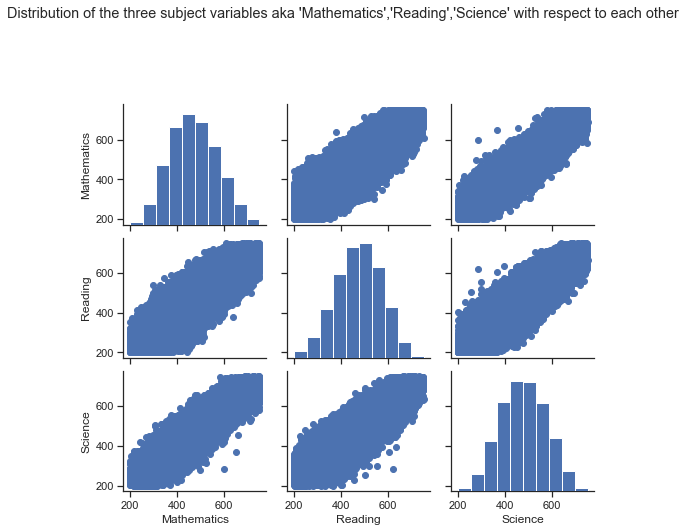

In [74]:
sb.set_style('ticks',{'axis.grid': False})

g = sb.PairGrid(data = pisa_2012_clean, vars = ['Mathematics','Reading','Science']);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);
g.fig.suptitle("Distribution of the three subject variables aka 'Mathematics','Reading','Science' with respect to each other")
g.fig.subplots_adjust(top=0.8);


Summary of Multivariate Exploration

1. A student good at one subject is likely to be good at others as well.
2. No Gender discrimination is observed when viewing relationship between two variables

### Conclusion

1. Gender played no role in the relationships of different features with student scores.
2. A good student is good across all subjects and a bad student is bad across all subjects.
3. Parents education is an important variable for a student scoring well in the PISA survey.
4. Students from country located in Asia and Europe tend to perform better than others.
5. The availabilty of books at home did not prove to have a strong impact on the scores of a student.